# **Analyzing Baltimore Crime**

The dataset below is taken from the City of Baltimore's crime dataset on [data.baltimorecity.gov](https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data/explore?location=39.203216%2C-76.765856%2C10.00&showTable=true).

**About the data set**

Crime is present to every large city. 

K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, you will implement K-Means clustering to find intrinsic groups within the dataset that display the same status_type behaviour.

**Import libraries**

In [1]:
# Add all needed libraries to work on your data set
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
# %matplotlib inline
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Acquire data

In [2]:
# Read .csv file
df = pd.read_csv('./BaltimoreCrimeData2.csv')

# Inspect data

In [3]:
# Write code to inspect the data frame
df

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.414259e+06,576071.018749,1,2022/04/30 13:30:00+00,6F,3400 ANNAPOLIS RD,LARCENY,NaN,NaN,922,SOUTHERN,CHERRY HILL,39.2479,-76.6401,"(39.2479,-76.6401)",NaN,NaN,1,NaN
1,1.418086e+06,588980.240444,2,2022/04/30 17:07:00+00,6F,700 WASHINGTON BLVD,LARCENY,NaN,NaN,931,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2833,-76.6264,"(39.2833,-76.6264)",NaN,NaN,1,NaN
2,1.427835e+06,605376.263820,3,2022/04/30 03:00:00+00,4A,1700 E 33RD ST,AGG. ASSAULT,NaN,HANDGUN,412,NORTHEAST,COLDSTREAM HOMESTEAD MONTEBELLO,39.3282,-76.5917,"(39.3282,-76.5917)",NaN,NaN,1,NaN
3,1.408177e+06,581693.345888,4,2022/04/30 07:00:00+00,6D,1600 INVERNESS AVE,LARCENY FROM AUTO,NaN,PERSONAL_WEAPONS,831,SOUTHWEST,MORRELL PARK,39.2634,-76.6615,"(39.2634,-76.6615)",NaN,NaN,1,NaN
4,1.423119e+06,590276.152306,5,2022/04/30 20:33:00+00,3AO,500 E PRATT ST,ROBBERY - STREET,NaN,PERSONAL_WEAPONS,112,CENTRAL,INNER HARBOR,39.2868,-76.6086,"(39.2868,-76.6086)",NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,1.402664e+06,611832.272134,38275,2021/04/30 15:50:00+00,3B,3700 W BELVEDERE AVE,ROBBERY - STREET,O,NaN,633,NORTHWEST,ARLINGTON,39.3462,-76.6806,"(39.3462,-76.6806)",PARKING LOT-OUTSIDE,Northwestern,1,NaN
38275,1.407114e+06,593781.992379,38276,2021/04/30 08:25:00+00,4A,700 POPLAR GROVE ST,AGG. ASSAULT,I,FIREARM,814,SOUTHWEST,FRANKLINTOWN ROAD,39.2966,-76.6651,"(39.2966,-76.6651)",OTHER - INSIDE,NaN,1,NaN
38276,1.412161e+06,591178.506468,38277,2021/04/30 21:30:00+00,8H,1900 W FAYETTE ST,ARSON,O,FIRE,714,WESTERN,PENROSE/FAYETTE STREET OUTREACH,39.2894,-76.6473,"(39.2894,-76.6473)",STREET,NaN,1,NaN
38277,1.398955e+06,613021.557849,38278,2021/04/30 23:38:00+00,6E,4100 EMMART AVE,LARCENY,O,NaN,631,NORTHWEST,REISTERSTOWN STATION,39.3495,-76.6937,"(39.3495,-76.6937)",PARKING LOT-OUTSIDE,NaN,1,NaN


In [4]:
# Write code to get information about null values in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                38261 non-null  float64
 1   Y                38261 non-null  float64
 2   RowID            38279 non-null  int64  
 3   CrimeDateTime    38279 non-null  object 
 4   CrimeCode        38279 non-null  object 
 5   Location         38138 non-null  object 
 6   Description      38279 non-null  object 
 7   Inside_Outside   16846 non-null  object 
 8   Weapon           12088 non-null  object 
 9   Post             38192 non-null  object 
 10  District         38192 non-null  object 
 11  Neighborhood     38190 non-null  object 
 12  Latitude         38261 non-null  float64
 13  Longitude        38261 non-null  float64
 14  GeoLocation      38279 non-null  object 
 15  Premise          16846 non-null  object 
 16  VRIName          4138 non-null   object 
 17  Total_Incide

In [5]:
# Check for missing values
df.isnull().sum()

X                     18
Y                     18
RowID                  0
CrimeDateTime          0
CrimeCode              0
Location             141
Description            0
Inside_Outside     21433
Weapon             26191
Post                  87
District              87
Neighborhood          89
Latitude              18
Longitude             18
GeoLocation            0
Premise            21433
VRIName            34141
Total_Incidents        0
Shape              38279
dtype: int64

# Clean data

In [6]:
# Drop unwanted columns in the data set
dfEdit = df
dfEdit.drop(['CrimeDateTime', 'District', 'Inside_Outside', 'Post', 'GeoLocation', 'X', 'Y', 'RowID', 'Location', 'CrimeCode', 'Weapon', 'Premise', 'VRIName', 'Total_Incidents', 'Shape', 'Neighborhood'], 
axis=1, inplace=True)

In [7]:
# Check the summary again to see if there are no unwanted columns remaining
dfEdit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  38279 non-null  object 
 1   Latitude     38261 non-null  float64
 2   Longitude    38261 non-null  float64
dtypes: float64(2), object(1)
memory usage: 897.3+ KB


In [8]:
# Write code to inspect statistical information about the data set
dfEdit.describe()

,Latitude,Longitude
count,38261.000000,38261.000000
mean,39.280750,-76.570666
std,0.984564,1.918834
min,0.000000,-76.711100
25%,39.287300,-76.650100
50%,39.301600,-76.615400
75%,39.324700,-76.589300
max,39.372100,0.000000


In [9]:
# View the values of the 'Description' column
dfEdit['Description'].unique()

array(['LARCENY', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'ROBBERY - STREET',
       'ROBBERY - RESIDENCE', 'SHOOTING', 'COMMON ASSAULT', 'BURGLARY',
       'RAPE', 'ROBBERY - CARJACKING', 'AUTO THEFT',
       'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE'], dtype=object)

In [10]:
# Delete all rows that correspond to crimes other than 'HOMICIDE'
for i in range(0, 38279):
    if (dfEdit.Description[i] != 'HOMICIDE'): 
        dfEdit = dfEdit.drop(i)

In [11]:
# View the values of the 'Description' column
dfEdit['Description'].unique()

array(['HOMICIDE'], dtype=object)

In [12]:
# Write code to inspect the data frame
dfEdit

,Description,Latitude,Longitude
99,HOMICIDE,39.3264,-76.6827
100,HOMICIDE,39.2368,-76.6039
102,HOMICIDE,39.3264,-76.6827
182,HOMICIDE,39.3381,-76.5516
288,HOMICIDE,39.2292,-76.6062
...,...,...,...
37927,HOMICIDE,39.2957,-76.6327
38012,HOMICIDE,39.2838,-76.6567
38016,HOMICIDE,39.2883,-76.6586
38029,HOMICIDE,39.2833,-76.6860


In [13]:
# Drop rows with null values
dfEdit = dfEdit.dropna(axis=0, how='any', subset=None, inplace=False)

# Write code to inspect the data frame
dfEdit

,Description,Latitude,Longitude
99,HOMICIDE,39.3264,-76.6827
100,HOMICIDE,39.2368,-76.6039
102,HOMICIDE,39.3264,-76.6827
182,HOMICIDE,39.3381,-76.5516
288,HOMICIDE,39.2292,-76.6062
...,...,...,...
37927,HOMICIDE,39.2957,-76.6327
38012,HOMICIDE,39.2838,-76.6567
38016,HOMICIDE,39.2883,-76.6586
38029,HOMICIDE,39.2833,-76.6860


In [14]:
# Create dataframe to hold only numerical values
dfNum = dfEdit
dfNum = dfNum.drop(columns=['Description'])

In [15]:
# Write code to inspect the data frame
dfNum

,Latitude,Longitude
99,39.3264,-76.6827
100,39.2368,-76.6039
102,39.3264,-76.6827
182,39.3381,-76.5516
288,39.2292,-76.6062
...,...,...
37927,39.2957,-76.6327
38012,39.2838,-76.6567
38016,39.2883,-76.6586
38029,39.2833,-76.6860


# Plot data

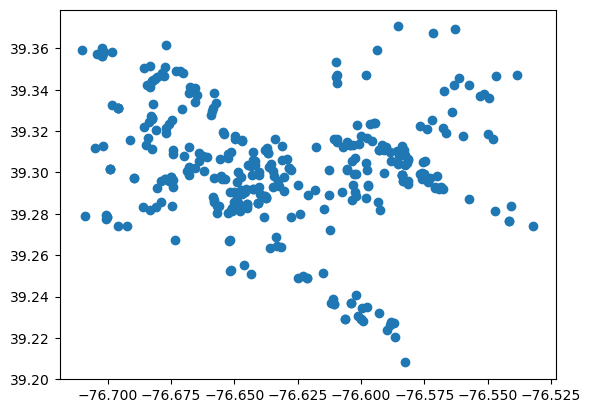

In [16]:
# Generate a scatter plot of Description and District
plt.scatter(dfNum['Longitude'], dfNum['Latitude'])

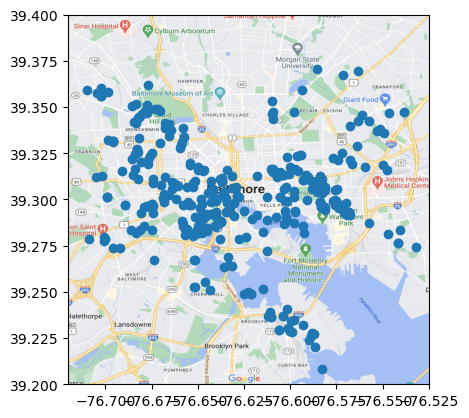

In [17]:
# Sets background image of plot
img = plt.imread('./BaltimoreMap.png')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-76.72,-76.525,39.20,39.40])
ax.scatter(dfNum['Longitude'], dfNum['Latitude'])
plt.show()

In [18]:
# Define the MinMaxScaler object and save in a variable called scaler
scaler = MinMaxScaler()

# Scale the Frequency feature
scaler.fit(dfNum[['Longitude']])
dfNum['Longitude'] = scaler.transform(dfNum[['Longitude']])

# Scale the Neighborhood feature
scaler.fit(dfNum[['Latitude']])
dfNum['Latitude'] = scaler.transform(dfNum[['Latitude']])

#TODO: Write code to inspect the scaled values of age and income.
# Notice that all the values are between 0 and 1
dfNum

,Latitude,Longitude
99,0.728000,0.153933
100,0.176615,0.596629
102,0.728000,0.153933
182,0.800000,0.890449
288,0.129846,0.583708
...,...,...
37927,0.539077,0.434831
38012,0.465846,0.300000
38016,0.493538,0.289326
38029,0.462769,0.135393


/Users/asitdas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asitdas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asitdas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asitdas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asitd

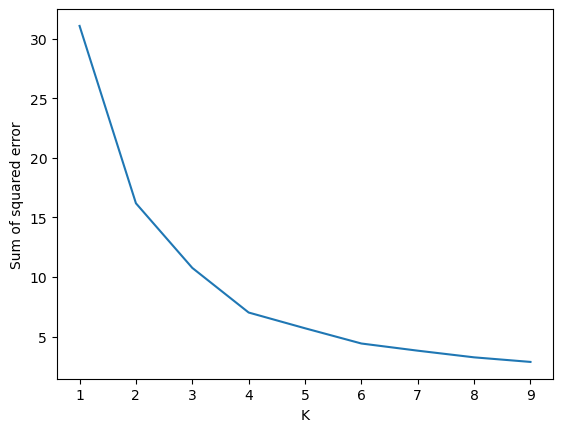

In [19]:
# Define a range for possible k values. In this example, we choose 1 to 10
k_rng = range(1,10)

# Declare an array to store the values from the sum of squared error values.
sse = []

# Using a for loop, go through each value in the k range and compute the sse value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfNum[['Longitude','Latitude']])
    sse.append(km.inertia_)

# Plot the sse value for each k.
# Notice that 3 is the elbow value.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
# Define a KMeans object with 3 as the value of k. Call the object km
km = KMeans(n_clusters=4)

# Write code to inspect km to see all the default parameters that we didn't have to specify
km #debug

KMeans(n_clusters=4)

In [21]:
# Save the prediction in an array and call it y_predicted
y_predicted = km.fit_predict(dfNum[['Longitude','Latitude']])

# Visualize the array. 
# Notice that every element is assigned one of the three cluster IDs: 0, 1, or 2
y_predicted

/Users/asitdas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, 0, 2, 2, 0, 1, 0, 2, 3, 1, 3, 3, 0, 2, 1, 2, 3, 1, 1, 1,
       3, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 1, 1, 0, 2, 3, 0,
       0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 2,
       0, 3, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       3, 3, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3,
       1, 1, 3, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 3, 0, 2, 0, 3,
       1, 1, 0, 1, 3, 3, 1, 3, 0, 3, 1, 3, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 3, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 3, 3, 1, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3,
       0, 3, 1, 0, 1, 1, 3, 0, 3, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 3, 0,
       1, 1, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 1, 3, 0,
       0, 3, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 1, 0,

In [22]:
# Add a column to the data frame to store the predicted cluster ID of each element
dfNum['cluster'] = y_predicted
# Write code to inspect "homicideFreq"
dfNum

,Latitude,Longitude,cluster
99,0.728000,0.153933,3
100,0.176615,0.596629,2
102,0.728000,0.153933,3
182,0.800000,0.890449,0
288,0.129846,0.583708,2
...,...,...,...
37927,0.539077,0.434831,1
38012,0.465846,0.300000,1
38016,0.493538,0.289326,1
38029,0.462769,0.135393,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


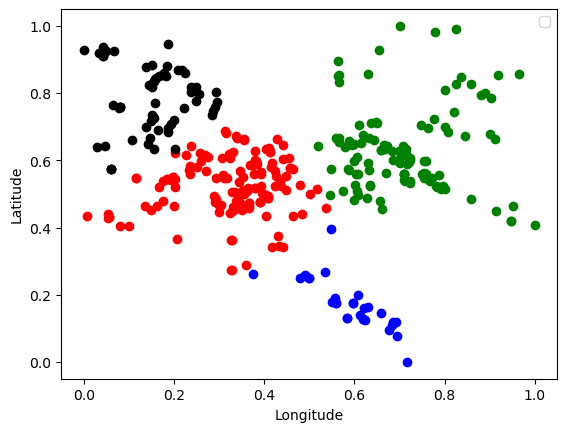

In [23]:
# Define the three data frames, df1, df2, df3, each belonging to one of the three clusters
clusterDf1 = dfNum[dfNum.cluster==0]
clusterDf2 = dfNum[dfNum.cluster==1]
clusterDf3 = dfNum[dfNum.cluster==2]
clusterDf4 = dfNum[dfNum.cluster==3]

# Plot the data frames with different colors to differentiate them
plt.scatter(clusterDf1.Longitude,clusterDf1['Latitude'],color='green')
plt.scatter(clusterDf2.Longitude,clusterDf2['Latitude'],color='red')
plt.scatter(clusterDf3.Longitude,clusterDf3['Latitude'],color='blue')
plt.scatter(clusterDf4.Longitude,clusterDf4['Latitude'],color='black')


# Define the labels on the x and y axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot the legend
plt.legend()

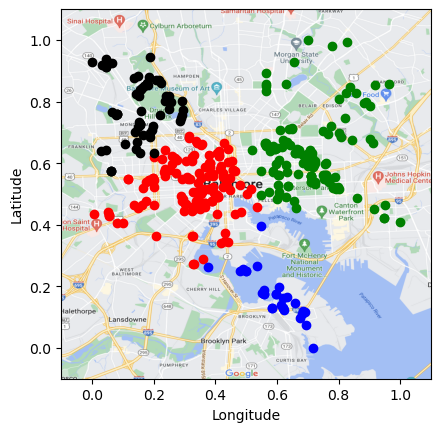

In [24]:
# Sets background image of clustered plot
img = plt.imread('./BaltimoreMap.png')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-.1,1.1,-.1,1.1])
ax.scatter(clusterDf1.Longitude,clusterDf1['Latitude'],color='green')
ax.scatter(clusterDf2.Longitude,clusterDf2['Latitude'],color='red')
ax.scatter(clusterDf3.Longitude,clusterDf3['Latitude'],color='blue')
ax.scatter(clusterDf4.Longitude,clusterDf4['Latitude'],color='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

How do we intepret the graph? Essentially, in the past year there has been a murder in every neighborhood in Baltimore. What will differ in each neighborhood is the frequency and/or amount over the course of the year, and we can hope to plot that using K-Means
